# EASY

Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../02/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
a = df[df['Age']<18]
percent = a.shape[0]/(df['PassengerId'].max())*100
print("%.2f" % percent, '%')

12.68 %


In [5]:
m = df[df['Sex']=='male']
f = df[df['Sex']=='female']
ratio = m.shape[0]/f.shape[0]
print("%.2f" % ratio)

1.84


# NORMAL

Посчитать по скольким людям нет информации (пола или возраста)

Вывести гистограмму по возрасту пассажиров

Посчитать какой процент мужин и женщин выжили, какой процент детей выжили.

Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью

In [6]:
new = df.drop(df.columns[[0,1,2,3,6,7,8,9,10,11]], axis = 1)
new1 = new.dropna(axis=0, how="any")
no_inf = new1.shape[0]
print(no_inf)

714


In [7]:
import matplotlib
import matplotlib.pyplot as plt

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

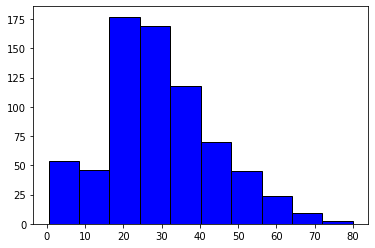

In [8]:
plt.hist(df['Age'], color = 'blue', edgecolor = 'black')

In [36]:
surv_m = df[(df['Survived']==1)&(df['Age']>=18)&(df['Sex']=='male')]
male = surv_m.count()/df.count()*100

surv_f = df[(df['Survived']==1)&(df['Age']>=18)&(df['Sex']=='female')]
female = surv_f.count()/df.count()*100

surv_ch = df[(df['Survived']==1)&(df['Age']<18)]
child = surv_ch.count()/df.count()*100

print ('Мужчины: %.2f' % male.PassengerId,
       'Женщины: %.2f' % female.PassengerId, 
       'Дети: %.2f' % child.PassengerId)

Мужчины: 7.86 Женщины: 17.85 Дети: 6.85


Корреляция между возрастом и выживаемостью

In [218]:
corr1 = df.drop(df.columns[[0,2,3,4,6,7,8,9,10,11]], axis = 1)
corr1.corr()

,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000


Корреляция между полом и выживаемостью